# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Dataset

In [2]:
data= pd.read_csv('netflix.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Inference :

* There are 8807 data points with details in 12 columns

* We could find out below observations after inspection of data :

    + There are null values in 6 Columns ( director, cast,country,date_added,rating and duration)
    
    + Date columns are having integer and Object as data types
    
    + Some data points have more than one value for 'director', 'cast','country' and 'listed_in' Columns


# 3. Data Preprocessing

## 3.1 Treating Null Values in Date_added,Rating & Duration:

### 3.1.1 Treating null values in Date_added, Rating & Duration:

In [6]:
data.isnull().sum() / data.shape[0] * 100.00

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

#### Inference :

* For columns 'date_added','rating' & 'duration' - null value % is less than 3% , hence na value is dropped

* For Columns 'director','cast' & 'country' - null value % is between 3 to 30% , hence median value can be imputed

In [7]:
data.dropna(subset=['date_added'],inplace=True)

In [8]:
data.dropna(subset=['rating'],inplace=True)

In [9]:
data.dropna(subset=['duration'],inplace=True)

In [10]:
data['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1765, dtype: int64

## 3.2 Treating Date and duration Columns

### 3.2.1 Converting 'Date_added' Column

In [11]:
data['date_added']=pd.to_datetime(data['date_added'])

In [12]:
#data['release_year']=pd.to_datetime(data['release_year'])

### 3.2.2 Removing Units in duration

In [13]:
mask1=data['type'] =='Movie'

In [14]:
data.loc[mask1,'duration']=data.loc[mask1,'duration'].apply(lambda x: str(x).replace('min',''))

In [15]:
mask2 = data['type']=='TV Show'

In [16]:
data.loc[mask2,'duration']=data.loc[mask2,'duration'].apply(lambda x: str(x).replace('Seasons',''))
data.loc[mask2,'duration']=data.loc[mask2,'duration'].apply(lambda x: str(x).replace('Season',''))

## 3.3 Adding New Columns

### 3.3.1 Adding New Columns from 'Date_added'

In [17]:
data['Month_added']=data['date_added'].dt.month_name()

In [18]:
data['Year_added']=data['date_added'].dt.year

In [19]:
data['Day_added']=data['date_added'].dt.day_name()

In [20]:
data['Week_added']=data['date_added'].dt.isocalendar().week

In [21]:
data['Release_difference']=data['Year_added'] - data['release_year']

In [22]:
data['title_length']=data['title'].apply(lambda x:len(x))

## 3.2 Treating Multiple Values in Director,Cast,Country & Listing Columns:

### 3.1.1 Treating Multiple Values in Cast

In [23]:
constraint=data['cast'].apply(lambda x: str(x).split(', ')).tolist()

In [24]:
data_new_cast=pd.DataFrame(constraint,index=data['title'])

In [25]:
data_new_cast=data_new_cast.stack()

In [26]:
data_new_cast=pd.DataFrame(data_new_cast)

In [27]:
data_new_cast.reset_index(inplace=True)

In [28]:
data_new_cast=data_new_cast[['title',0]]

In [29]:
data_new_cast.columns=['title','cast']

In [30]:
data_cast=data.merge(data_new_cast,left_on='title',right_on='title',how='left')

In [31]:
data_cast.drop('cast_x',axis=1,inplace=True)

In [32]:
data_cast.rename(columns={"cast_y":"cast"},inplace=True)

### 3.1.2 Treating Multiple Values in Director

In [33]:
constraint1=data['director'].apply(lambda x: str(x).split(', ')).tolist()

In [34]:
data_new_director=pd.DataFrame(constraint1,index=data['title'])

In [35]:
data_new_director=data_new_director.stack()

In [36]:
data_new_director=pd.DataFrame(data_new_director)

In [37]:
data_new_director.reset_index(inplace=True)

In [38]:
data_new_director=data_new_director[['title',0]]

In [39]:
data_new_director.columns=['title','director']

In [40]:
data_director=data_cast.merge(data_new_director,left_on='title',right_on='title',how='left')

In [41]:
data_director.drop('director_x',axis=1,inplace=True)

In [42]:
data_director.rename(columns={"director_y":"director"},inplace=True)

### 3.1.3 Treating Multiple Values in country

In [43]:
constraint2=data['country'].apply(lambda x: str(x).split(', ')).tolist()
data_new_country=pd.DataFrame(constraint2,index=data['title'])
data_new_country=data_new_country.stack()
data_new_country=pd.DataFrame(data_new_country)
data_new_country.reset_index(inplace=True)
data_new_country=data_new_country[['title',0]]
data_new_country.columns=['title','country']
data_country=data_director.merge(data_new_country,left_on='title',right_on='title',how='left')
data_country.drop('country_x',axis=1,inplace=True)
data_country.rename(columns={"country_y":"country"},inplace=True)

### 3.1.4 Treating Multiple Values in Listed_in

In [44]:
constraint3=data['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
data_new_listed_in=pd.DataFrame(constraint3,index=data['title'])
data_new_listed_in=data_new_listed_in.stack()
data_new_listed_in=pd.DataFrame(data_new_listed_in)
data_new_listed_in.reset_index(inplace=True)
data_new_listed_in=data_new_listed_in[['title',0]]
data_new_listed_in.columns=['title','listed_in']
data_listed_in=data_country.merge(data_new_listed_in,left_on='title',right_on='title',how='left')
data_listed_in.drop('listed_in_x',axis=1,inplace=True)
data_listed_in.rename(columns={"listed_in_y":"listed_in"},inplace=True)

## 3.2 Treating Date and duration Columns

### 3.2.1 Converting 'Date_added' Column

In [45]:
data_listed_in['date_added']=pd.to_datetime(data_listed_in['date_added'])

### 3.2.2 Removing Units in duration

In [46]:
mask1=data_listed_in['type'] =='Movie'

In [47]:
data_listed_in.loc[mask1,'duration']=data_listed_in.loc[mask1,'duration'].apply(lambda x: str(x).replace('min',''))

In [48]:
mask2 = data_listed_in['type']=='TV Show'

In [49]:
data_listed_in.loc[mask2,'duration']=data_listed_in.loc[mask2,'duration'].apply(lambda x: str(x).replace('Seasons',''))
data_listed_in.loc[mask2,'duration']=data_listed_in.loc[mask2,'duration'].apply(lambda x: str(x).replace('Season',''))

## 3.3 Treating Null Values in director, cast,country

### 3.3.1 Treating Null Values in director

In [50]:
data_dir_movie=data_listed_in[data_listed_in['type']=='Movie']

In [51]:
data_dir_movie_director=data_dir_movie.groupby(['director'])['title'].nunique()

In [52]:
data_dir_movie_director=data_dir_movie_director.reset_index().sort_values(by='title',ascending=False)

In [53]:
data_dir_movie_director

,director,title
4760,nan,187
3580,Rajiv Chilaka,22
1816,Jan Suter,21
3631,Raúl Campos,19
4259,Suhas Kadav,16
...,...,...
2190,José Ortuño,1
596,Bob Persichetti,1
2192,Jovanka Vuckovic,1
595,Bob Odenkirk,1


In [54]:
data_listed_in_dir_null=data_dir_movie_director.copy()

In [55]:
data_listed_in_dir_null.loc[:,'director']=data_listed_in_dir_null.loc[:,'director'].replace('nan','Rajiv Chilaka',regex=True)

#### Inference :

* For Movies, After nan, most occuring value is 'Rajiv Chilaka'. hence it will be imputed for nan Values

In [56]:
data_dir_tvshow_director=data_listed_in[data_listed_in['type']=='TV Show']

In [57]:
data_dir_tvshow_director=data_dir_tvshow_director.groupby(['director'])['title'].nunique()

In [58]:
data_dir_tvshow_director=data_dir_tvshow_director.reset_index().sort_values(by='title',ascending=False)

In [59]:
data_dir_tvshow_director

,director,title
299,nan,2434
146,Ken Burns,3
8,Alastair Fothergill,3
140,Jung-ah Im,2
128,Joe Berlinger,2
...,...,...
99,Houda Benyamina,1
98,Hong Won-ki,1
97,Hiroyuki Seshita,1
96,Hikaru Toda,1


In [60]:
data_listed_in_tvdir_null=data_dir_tvshow_director.copy()

In [61]:
data_listed_in_tvdir_null.loc[:,'director']=data_listed_in_tvdir_null.loc[:,'director'].replace('nan','Ken Burns',regex=True)

#### Inference :

* For TV Shows, After nan, most occuring value is 'Ken Burns'. hence it will be imputed for nan Values

### 3.3.2 Treating Null Values in cast

In [62]:
movie_listed_in=data_listed_in[data_listed_in['type']=='Movie']

In [63]:
data_cast_movie_director=movie_listed_in.groupby(['cast'])['title'].nunique()

In [64]:
data_cast_movie_director=data_cast_movie_director.reset_index().sort_values(by='title',ascending=False)

#### Inference :

* For Movies, After nan, most occuring value is 'Anupam Kher'. hence it will be imputed for nan Values

In [65]:
data_listed_in_dirCast_null=movie_listed_in.copy()

In [66]:
data_listed_in_dirCast_null.loc[:,'cast']=data_listed_in_dirCast_null.loc[:,'cast'].replace('nan','Anupam Kher',regex=True)

In [67]:
tvshow_listed_in=data_listed_in[data_listed_in['type']=='TV Show']

In [68]:
data_cast_tvshow_director=tvshow_listed_in.groupby(['cast'])['title'].nunique()

In [69]:
data_cast_tvshow_director=data_cast_tvshow_director.reset_index().sort_values(by='title',ascending=False)

In [70]:
data_cast_tvshow_director

,cast,title
14743,nan,350
13172,Takahiro Sakurai,25
14519,Yuki Kaji,19
2863,Daisuke Ono,17
6772,Junichi Suwabe,17
...,...,...
5424,Ivy Yin,1
5428,Iván Pellicer,1
5430,Iván Álvarez de Araya,1
5431,Iza Moreira,1


In [71]:
data_listed_in_dirCasttv_null=tvshow_listed_in.copy()

In [72]:
data_listed_in_dirCasttv_null.loc[:,'cast']=data_listed_in_dirCasttv_null.loc[:,'cast'].replace('nan','Takahiro Sakurai',regex=True)

#### Inference :

* For Movies, After nan, most occuring value is 'Takahiro Sakurai'. hence it will be imputed for nan Values

### 3.3.3 Treating Null Values in Country

In [73]:
data_listed_in['country'].value_counts()

United States     59262
India             22814
United Kingdom    12918
nan               11894
Japan              8599
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: country, Length: 128, dtype: int64

In [74]:
data_listed_in_dirCastcoun_null=data_listed_in_dirCast_null.copy()

In [75]:
data_listed_in_dirCastcoun_null.loc[:,'country']=data_listed_in_dirCastcoun_null.loc[:,'country'].replace('nan','United States',regex=True)

#### Inference :

* After nan, most occuring value is 'United States'. hence it will be imputed for nan Values

# 4. Analysis

## 4.1 Univariate Analysis

### 4.1.1 Show Type

In [76]:
data.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

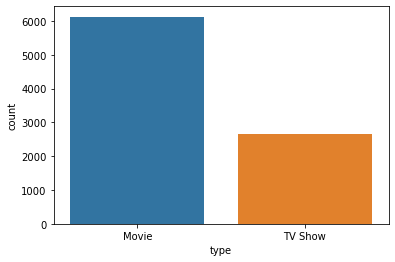

In [77]:
sns.countplot(data=data,x='type')

In [78]:
data.type.value_counts(normalize=True)*100

Movie      69.692833
TV Show    30.307167
Name: type, dtype: float64

#### Inference :

* It seems almost 70% of show type telecasted in Netflix are 'Movies'

#### Recommendations :

* It is highly recommended to increase "TV shows" as it is only 30% of total shows telecasted in Netflix 


### 4.1.2 Title

### Inference

* Since Title is having unique values. We can explore title length to find any useful info  

In [79]:
data['title_length'].describe()

count    8790.00000
mean       17.71843
std        10.62300
min         1.00000
25%        10.00000
50%        15.00000
75%        23.00000
max       104.00000
Name: title_length, dtype: float64

### Inference

* Almost 75% of the Movie/tv shows telecasted in Netflix have title of length 23 
* Maximum length of the Movie/TV show title is 104
* Minimum length of the Movie/TV Show is 1


In [80]:
data['title_length'].value_counts(ascending=False)

10    460
12    459
13    453
11    450
15    434
     ... 
71      1
77      1
76      1
73      1
78      1
Name: title_length, Length: 77, dtype: int64

### Inference

* 460 Movie/Tv shows have title of length 10

<AxesSubplot:xlabel='title_length', ylabel='Density'>

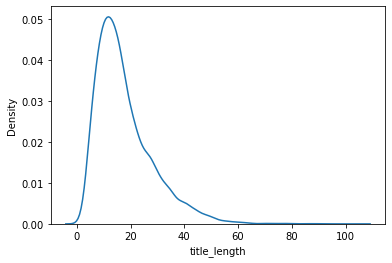

In [81]:
sns.kdeplot(data=data,x='title_length')

<AxesSubplot:xlabel='title_length', ylabel='Count'>

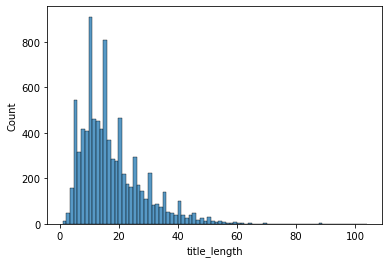

In [82]:
sns.histplot(data=data,x='title_length')

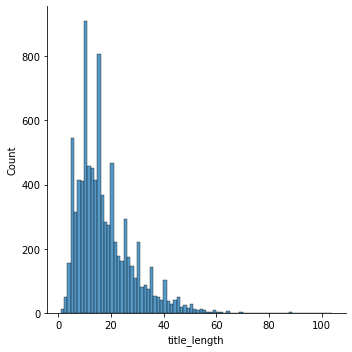

In [83]:
sns.displot(data['title_length'])

### Inference

* It seems most of the  Movie/TV shows have title of length less than 15 

### 4.1.3 Date_added & additional Date Fields

In [84]:
data['date_added'].value_counts()

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: date_added, Length: 1713, dtype: int64

### Inference

* Jan 1 2020 records the highest addition of Movies/TV Shows in Netflix
* Nov 1 2019 records the second highest addition of Movies/TV Shows in Netflix

In [85]:
data['Month_added'].value_counts(ascending=False)

July         827
December     812
September    769
April        763
October      760
August       754
March        741
January      737
June         728
November     705
May          632
February     562
Name: Month_added, dtype: int64

In [86]:
res=data['Month_added'].value_counts().to_frame().reset_index().sort_values('Month_added',ascending=False)

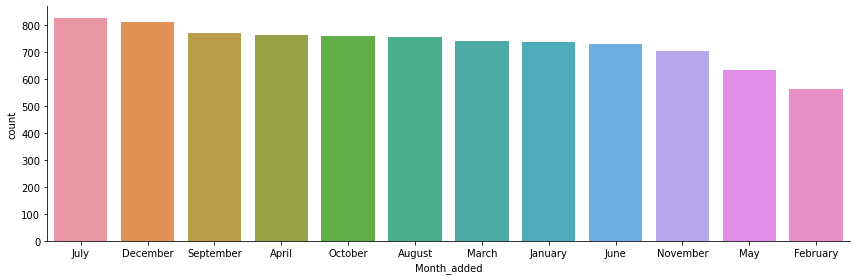

In [87]:
sns.catplot(x="Month_added",
                data=data, kind="count",
                height=4, aspect=3,
                order=res['index']
                )

### Inference

* July records the highest addition of Movies/TV Shows in Netflix
* It seems more number of Movie/TV Shows gets added in Net flix in Second Half of the Year

In [88]:
data['Year_added'].value_counts(normalize=True)*100

2019    22.935154
2020    21.376564
2018    18.748578
2021    17.042093
2017    13.481229
2016     4.846416
2015     0.932878
2014     0.273038
2011     0.147895
2013     0.125142
2012     0.034130
2009     0.022753
2008     0.022753
2010     0.011377
Name: Year_added, dtype: float64

<AxesSubplot:xlabel='Year_added', ylabel='Count'>

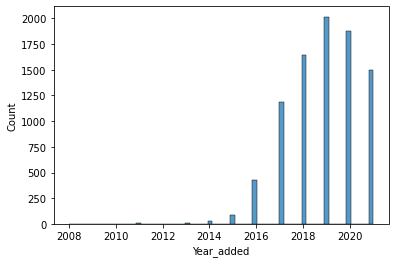

In [89]:
sns.histplot(data=data,
              x='Year_added',
             )

### Inference

* Almost 78% of Movie/TV shows gets added from 2018 - 2021

In [90]:
data['Day_added'].value_counts(ascending=False,normalize=True)*100

Friday       28.407281
Thursday     15.847554
Wednesday    14.641638
Tuesday      13.606371
Monday        9.670080
Saturday      9.283276
Sunday        8.543800
Name: Day_added, dtype: float64

In [91]:
res=data['Day_added'].value_counts().to_frame().reset_index().sort_values('Day_added',ascending=False)

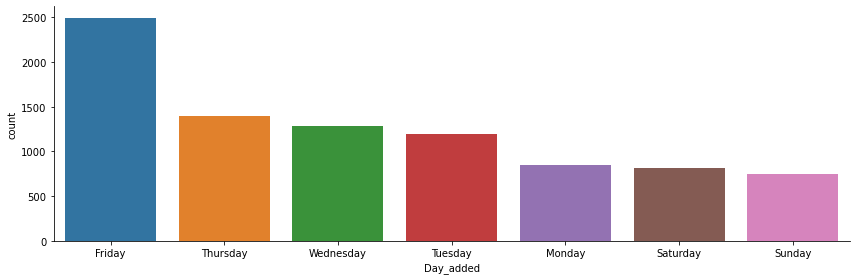

In [92]:
sns.catplot(x="Day_added",
                data=data, kind="count",
                height=4, aspect=3,
                order=res['index']
                )

### Inference

* Almost 43% of Movie/TV shows gets added in Thursday and Friday

In [93]:
data['Week_added'].value_counts(ascending=False).head(5)

1     372
44    318
40    287
31    268
26    268
Name: Week_added, dtype: Int64

<AxesSubplot:xlabel='Week_added', ylabel='Count'>

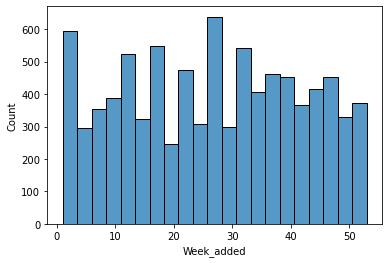

In [94]:
sns.histplot(data=data,x='Week_added')

### Inference

* January 1st week records the highest number of additon of Movies/TV Shows
* Week 26 to 30 records collective highest number of addition on Movies/TV shows

In [95]:
data['release_year'].nunique()

74

In [96]:
data['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [97]:
res3=data['release_year'].value_counts().to_frame().reset_index().sort_values('release_year',ascending=False)

<AxesSubplot:xlabel='index', ylabel='release_year'>

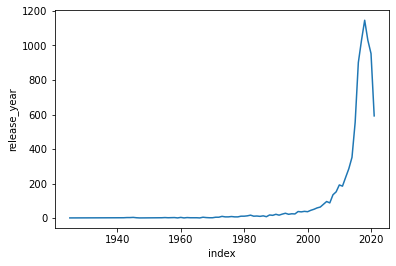

In [98]:
sns.lineplot(data=res3,
            x='index',
            y='release_year')

### Inference

* Movies/TV Shows released in the year 2018  telecasted most in Netflix
* Movies/TV Shows released after 2010 get telecasted most in Netflix

In [99]:
data['Release_difference'].value_counts(normalize=True).head()

0    0.368487
1    0.180205
2    0.081115
3    0.055631
4    0.041752
Name: Release_difference, dtype: float64

In [100]:
data[data['Release_difference']==0]['release_year'].value_counts().head()

2020    777
2019    667
2021    589
2018    561
2017    379
Name: release_year, dtype: int64

### Inference

* Most of the Movies / TV Shows released after 2017 gets added in that year itself
* Movies/TV Shows released in the year 2020  gets added in the same year

### 4.1.4 Director

In [101]:
data_listed_in['director'].value_counts()

nan                    50425
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Richard E. Norman          1
Spencer Williams           1
Oscar Micheaux             1
Tony Stone                 1
Kirsten Johnson            1
Name: director, Length: 4992, dtype: int64

In [102]:
data_listed_in['director'].nunique()

4992

### Inference

* Martin Scorsese and Youssef Chahine seems to be contributing more in Netflix telecasted Movie/TV shows
* It seems around 4991 directors work is captured in Netflix

### 4.1.5 cast

In [103]:
data_listed_in['cast'].value_counts()

nan                    2146
Liam Neeson             161
Alfred Molina           160
John Krasinski          139
Salma Hayek             130
                       ... 
Lala Kent                 1
Sarah May Sommers         1
Trevor Gretzky            1
Emily Calandrelli         1
Keith Arthur Bolden       1
Name: cast, Length: 36393, dtype: int64

In [104]:
data_listed_in['cast'].nunique()

36393

### Inference

* Netflix seems to be telecasting Movie/TV shows involving Liam Neeson and Alfred Molina more
* 36392 actors work is captured in Netflix

### 4.1.6 Country

In [105]:
data_listed_in['country'].value_counts()

United States     59262
India             22814
United Kingdom    12918
nan               11894
Japan              8599
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: country, Length: 128, dtype: int64

In [106]:
data_listed_in['country'].nunique()

128

### Inference

* Netflix seems to be telecasted in 127 countries
* United States , India , United Kingdom are major countries Netflix focusing on

### 4.1.7 Rating

In [107]:
data['rating'].value_counts(ascending=False)

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [108]:
data['rating'].nunique()

14

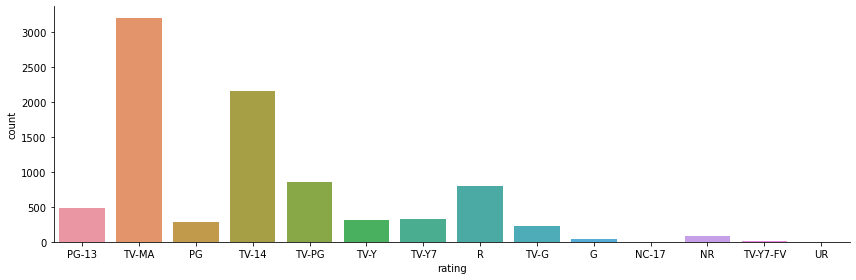

In [109]:
sns.catplot(x="rating",
                data=data, kind="count",
                height=4, aspect=3
                )

### Inference

* Netflix seems to be telecasting 14 different rating TV shows/Movie
* TV-MA seems to be the top rating in TV shows
* R seems to be top rating in Movies

### 4.1.8 Listed_in

In [110]:
data_listed_in['listed_in'].value_counts()

Dramas                          29768
International Movies            28211
Comedies                        20829
International TV Shows          12815
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8933
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4907
Crime TV Shows                   4715
Horror Movies                    4571
Kids' TV                         4555
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
TV Action & Adventure            2278
Anime Series                     2273
Spanish-Language TV Shows        2118
British TV Shows                 1799
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

In [111]:
data_listed_in['listed_in'].nunique()

42

### Inference

* Netflix seems to be telecasting 14 different genres/rating TV shows/Movie
* Dramas seems to be the top genre in TV shows/Movies
* Science & Nature TV seems to be least genre in TV shows/Movies

## 4.2 Bivariate Analysis/Multivariate  Analysis

### 4.2.1 Type Vs Title length

In [112]:
data[data['type']=='Movie']['title_length'].value_counts()

12     309
10     303
13     300
15     300
11     296
      ... 
104      1
71       1
73       1
78       1
65       1
Name: title_length, Length: 76, dtype: int64

In [113]:
data[data['type']=='Movie']['title_length'].describe()

count    6126.000000
mean       18.019915
std        11.064070
min         1.000000
25%        10.000000
50%        15.000000
75%        23.000000
max       104.000000
Name: title_length, dtype: float64

In [114]:
data[data['type']=='TV Show']['title_length'].value_counts().head()

10    157
11    154
13    153
12    150
9     140
Name: title_length, dtype: int64

In [115]:
data[data['type']=='TV Show']['title_length'].describe()

count    2664.000000
mean       17.025150
std         9.497343
min         1.000000
25%        10.000000
50%        15.000000
75%        22.000000
max        93.000000
Name: title_length, dtype: float64

<AxesSubplot:xlabel='type', ylabel='title_length'>

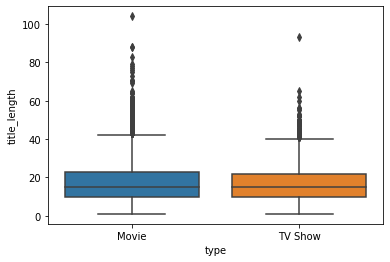

In [116]:
sns.boxplot(data=data,x='type',y='title_length')

### 4.2.2 Type Vs Directors

#### Movies

In [117]:
data_dir_movie=data_listed_in[data_listed_in['type']=='Movie']

In [118]:
data_dir_movie_count=data_dir_movie.groupby(by=['title'])['director'].nunique()

In [119]:
data_dir_movie_count=data_dir_movie_count.reset_index().sort_values(by='director',ascending=False)

In [120]:
data_dir_movie_count[data_dir_movie_count['director']>1].head()

,title,director
5872,Walt Disney Animation Studios Short Films Coll...,13
2030,HALO Legends,12
3345,Movie 43,12
4447,"Sincerely Yours, Dhaka",11
6036,X: Past Is Present,11


In [121]:
data_dir_movie_count[data_dir_movie_count['director']==1].head()

,title,director
4107,Road Trip: Beer Pong,1
4075,Reversing Roe,1
4156,Rounders,1
4090,Riding Faith,1
4074,Revenger,1


In [122]:
print(data_dir_movie_count[data_dir_movie_count['director']==1].shape[0])
print(data_dir_movie_count[data_dir_movie_count['director']>1].shape[0])

5555
571


In [123]:
data_dir_movie_director=data_dir_movie.groupby(['director'])['title'].nunique()

In [124]:
data_dir_movie_director=data_dir_movie_director.reset_index().sort_values(by='title',ascending=False)

In [125]:
data_dir_movie_director.head()

,director,title
4760,nan,187
3580,Rajiv Chilaka,22
1816,Jan Suter,21
3631,Raúl Campos,19
4259,Suhas Kadav,16


In [126]:
print(data_dir_movie_director[data_dir_movie_director['title']==1].shape[0])
print(data_dir_movie_director[data_dir_movie_director['title']>1].shape[0])

3808
968


In [127]:
data_dir_movie_count.head()

,title,director
5872,Walt Disney Animation Studios Short Films Coll...,13
2030,HALO Legends,12
3345,Movie 43,12
4447,"Sincerely Yours, Dhaka",11
6036,X: Past Is Present,11


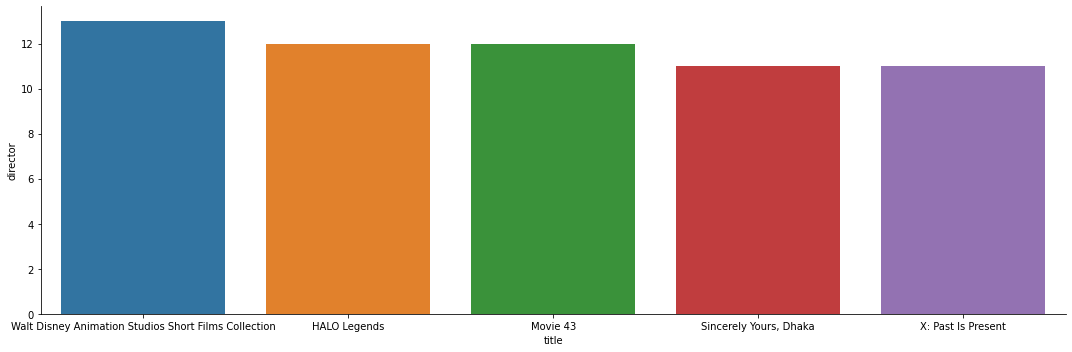

In [128]:
sns.catplot(x="title", y="director",
            data=data_dir_movie_count.head(), kind="bar",
            height=5, aspect=3);

#### TV Shows

In [129]:
data_dir_tvshow=data_listed_in[data_listed_in['type']=='TV Show']

In [130]:
data_dir_tvshow_count=data_dir_tvshow.groupby(by=['title'])['director'].nunique()

In [131]:
data_dir_tvshow_count=data_dir_tvshow_count.reset_index().sort_values(by='director',ascending=False)

In [132]:
data_dir_tvshow_count[data_dir_tvshow_count['director']>1].head()

,title,director
1486,Navarasa,9
1442,My Love: Six Stories of True Love,7
2392,Til Death Do Us Part,7
2428,Trailer Park Boys: The Animated Series,5
1884,Six Windows in the Desert,5


In [133]:
data_dir_tvshow_count[data_dir_tvshow_count['director']==1].head()

,title,director
1765,Riverdale,1
1766,Robocar Poli,1
1764,Rita,1
1783,Rurouni Kenshin,1
1763,Rishta.com,1


In [134]:
print(data_dir_tvshow_count[data_dir_tvshow_count['director']==1].shape[0])
print(data_dir_tvshow_count[data_dir_tvshow_count['director']>1].shape[0])

2622
42


In [135]:
data_dir_tvshow_count[data_dir_tvshow_count['director']==1]

,title,director
1765,Riverdale,1
1766,Robocar Poli,1
1764,Rita,1
1783,Rurouni Kenshin,1
1763,Rishta.com,1
...,...,...
894,Hello Ninja,1
895,"Hello, Me!",1
896,"Hello, My Twenties!",1
897,Hemlock Grove,1


In [136]:
data_dir_tvshow_director=data_dir_tvshow.groupby(['director'])['title'].nunique()

In [137]:
data_dir_tvshow_director=data_dir_tvshow_director.reset_index().sort_values(by='title',ascending=False)

In [138]:
data_dir_tvshow_director.head()

,director,title
299,nan,2434
146,Ken Burns,3
8,Alastair Fothergill,3
140,Jung-ah Im,2
128,Joe Berlinger,2


In [139]:
print(data_dir_tvshow_director[data_dir_tvshow_director['title']>1].shape[0])

12


### 4.2.3 Type Vs Cast

In [140]:
data_cast_title=data_dir_movie.groupby(['cast'])['title'].nunique()

data_cast_title=data_cast_title.reset_index().sort_values(by='title',ascending=False)

data_cast_title.head()

,cast,title
25860,nan,475
2102,Anupam Kher,42
21774,Shah Rukh Khan,35
17187,Naseeruddin Shah,32
18058,Om Puri,30


In [141]:
data_casttv_title=data_dir_tvshow.groupby(['cast'])['title'].nunique()

data_casttv_title=data_casttv_title.reset_index().sort_values(by='title',ascending=False)

data_casttv_title.head()

,cast,title
14743,nan,350
13172,Takahiro Sakurai,25
14519,Yuki Kaji,19
2863,Daisuke Ono,17
6772,Junichi Suwabe,17


### 4.2.4 Type Vs Country

In [142]:
data_ctry_count=data_dir_movie.groupby(by=['title'])['country'].nunique()

data_ctry_count=data_ctry_count.reset_index().sort_values(by='country',ascending=False)

data_ctry_count

,title,country
615,Barbecue,12
5188,The Look of Silence,10
5329,The Professor and the Madman,8
4913,The Congress,7
5444,The Take,7
...,...,...
2246,Hridaynath,1
2244,How to Win the US Presidency,1
2243,How to Train Your Dragon 2,1
2242,How to Stage a Coup,1


In [143]:
data_ctry_count[data_ctry_count['country']>1]

,title,country
615,Barbecue,12
5188,The Look of Silence,10
5329,The Professor and the Madman,8
4913,The Congress,7
5444,The Take,7
...,...,...
2204,Horns,2
1744,First They Killed My Father,2
5678,Tremors 5: Bloodline,2
4690,THE RUM DIARY,2


In [144]:
data_ctry_count[data_ctry_count['country']==1]

,title,country
4454,Sinister Circle,1
4428,Si Doel the Movie 2,1
4235,Sanai Choughade,1
4234,San Pietro,1
4390,She Made Me a Criminal,1
...,...,...
2246,Hridaynath,1
2244,How to Win the US Presidency,1
2243,How to Train Your Dragon 2,1
2242,How to Stage a Coup,1


In [145]:
data_ctrytv_count=data_dir_tvshow.groupby(by=['title'])['country'].nunique()

data_ctrytv_count=data_ctrytv_count.reset_index().sort_values(by='country',ascending=False)

data_ctrytv_count

,title,country
1849,Shaun the Sheep,8
751,Frozen Planet,6
2240,The Making of Frozen Planet,6
2478,Ultimate Beastmaster,6
248,Black Crows,5
...,...,...
921,Historical Roasts,1
922,History 101,1
923,History of Swear Words,1
924,History's Greatest Hoaxes,1


In [146]:
data_ctrytv_count[data_ctrytv_count['country']>1]

,title,country
1849,Shaun the Sheep,8
751,Frozen Planet,6
2240,The Making of Frozen Planet,6
2478,Ultimate Beastmaster,6
248,Black Crows,5
...,...,...
2525,Vientos de agua,2
1474,Nailed It! Mexico,2
8,1983,2
1553,On the Verge,2


In [147]:
data_ctrytv_count[data_ctrytv_count['country']==1]

,title,country
1835,Seven Seconds,1
1832,Sensitive Skin,1
1836,Seven and Me,1
1834,Servant of the People,1
1430,My Babysitter's a Vampire,1
...,...,...
921,Historical Roasts,1
922,History 101,1
923,History of Swear Words,1
924,History's Greatest Hoaxes,1


In [148]:
data_ctrymov_title=data_dir_movie.groupby(['country'])['title'].nunique()

data_ctrymov_title=data_ctrymov_title.reset_index().sort_values(by='title',ascending=False)

data_ctrymov_title.head(8)



,country,title
114,United States,2748
43,India,962
112,United Kingdom,532
122,nan,439
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171


In [149]:
data_ctrytv_title=data_dir_tvshow.groupby(['country'])['title'].nunique()

data_ctrytv_title=data_ctrytv_title.reset_index().sort_values(by='title',ascending=False)

data_ctrytv_title.head(8)

,country,title
63,United States,932
66,nan,390
62,United Kingdom,271
30,Japan,197
52,South Korea,170
8,Canada,126
19,France,90
25,India,84


### 4.2.5 Type Vs Date_added

In [150]:
data_yearmov_count=data_dir_movie.groupby(by=['Year_added'])['title'].nunique()

data_yearmov_count=data_yearmov_count.reset_index().sort_values(by='Year_added',ascending=False)

data_yearmov_count.columns=['Year_added','Movie_count']

data_yeartv_count=data_dir_tvshow.groupby(by=['Year_added'])['title'].nunique()

data_yeartv_count=data_yeartv_count.reset_index().sort_values(by='Year_added',ascending=False)

data_yeartv_count.columns=['Year_added','TV_Show_count']

In [151]:
data_year_count=data_yearmov_count.merge(data_yeartv_count,left_on='Year_added',right_on='Year_added',how='inner')

<AxesSubplot:xlabel='Year_added', ylabel='Movie_count'>

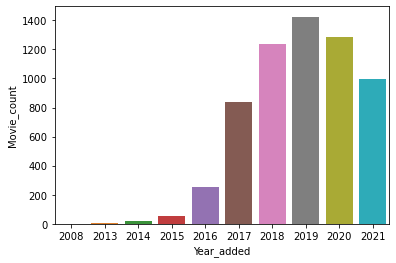

In [152]:
sns.barplot(data=data_year_count,x='Year_added',y='Movie_count')

<AxesSubplot:xlabel='Year_added', ylabel='TV_Show_count'>

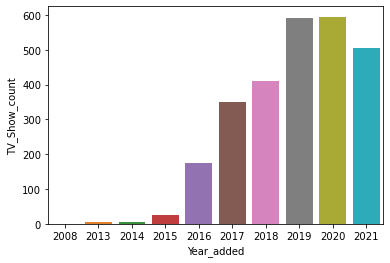

In [153]:
sns.barplot(data=data_year_count,x='Year_added',y='TV_Show_count')

### 4.2.6 Type Vs Release year

In [154]:
data_relmov_count=data_dir_movie.groupby(by=['release_year'])['title'].nunique()

data_relmov_count=data_relmov_count.reset_index().sort_values(by='release_year',ascending=False)

data_relmov_count.columns=['release_year','Movie_count']

data_reltv_count=data_dir_tvshow.groupby(by=['release_year'])['title'].nunique()

data_reltv_count=data_reltv_count.reset_index().sort_values(by='release_year',ascending=False)

data_reltv_count.columns=['release_year','TV_Show_count']

In [155]:
data_rel_count=data_relmov_count.merge(data_reltv_count,left_on='release_year',right_on='release_year',how='inner')

In [156]:
data_rel_count.describe()

,release_year,Movie_count,TV_Show_count
count,45.000000,45.000000,45.000000
mean,1996.177778,133.088889,59.177778
std,18.411075,211.405343,117.616343
min,1945.000000,1.000000,1.000000
25%,1988.000000,15.000000,1.000000
50%,1999.000000,33.000000,4.000000
75%,2010.000000,145.000000,39.000000
max,2021.000000,767.000000,436.000000


<AxesSubplot:xlabel='release_year', ylabel='Movie_count'>

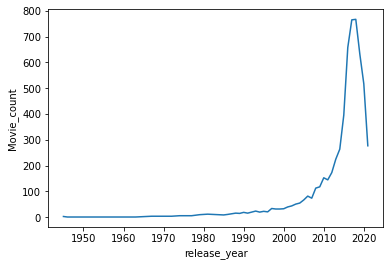

In [157]:
sns.lineplot(data=data_rel_count,x='release_year',y='Movie_count')

<AxesSubplot:xlabel='release_year', ylabel='TV_Show_count'>

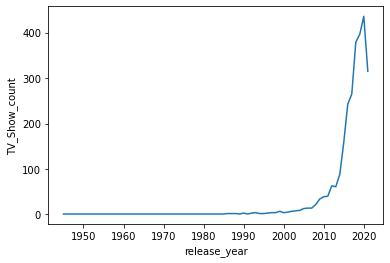

In [158]:
sns.lineplot(data=data_rel_count,x='release_year',y='TV_Show_count')

### 4.2.7 Type Vs Rating

In [159]:
data_ratmov_count=data_dir_movie.groupby(by=['rating'])['title'].nunique()

data_ratmov_count=data_ratmov_count.reset_index().sort_values(by='rating',ascending=False)

data_ratmov_count.columns=['rating','Movie_count']

data_rattv_count=data_dir_tvshow.groupby(by=['rating'])['title'].nunique()

data_rattv_count=data_rattv_count.reset_index().sort_values(by='rating',ascending=False)

data_rattv_count.columns=['rating','TV_Show_count']

In [160]:
data_rat_count=data_ratmov_count.merge(data_rattv_count,left_on='rating',right_on='rating',how='outer')

In [161]:
data_rat_count

,rating,Movie_count,TV_Show_count
0,UR,3,NaN
1,TV-Y7-FV,5,1.0
2,TV-Y7,139,194.0
3,TV-Y,131,175.0
4,TV-PG,540,321.0
5,TV-MA,2062,1143.0
6,TV-G,126,94.0
7,TV-14,1427,730.0
8,R,797,2.0
9,PG-13,490,NaN


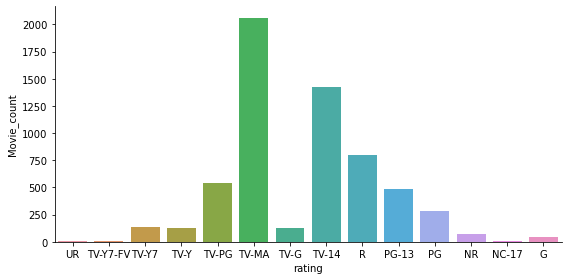

In [162]:
sns.catplot(x="rating", y="Movie_count",
                data=data_rat_count, kind="bar",
                height=4, aspect=2)

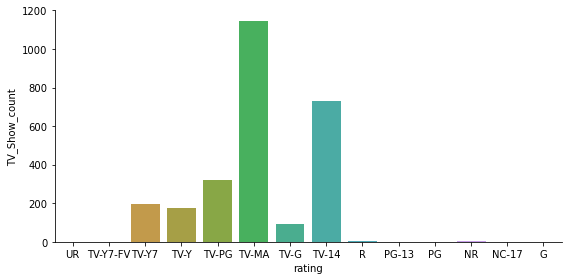

In [163]:
sns.catplot(x="rating", y="TV_Show_count",
                data=data_rat_count, kind="bar",
                height=4, aspect=2)

### 4.2.8 Type Vs Duration

In [164]:
data['duration']=pd.to_numeric(data['duration'])

In [165]:
data['duration'].describe()

count    8790.000000
mean       69.934471
std        50.794433
min         1.000000
25%         2.000000
50%        88.500000
75%       106.000000
max       312.000000
Name: duration, dtype: float64

In [166]:
movie_data=data[data['type']=='Movie'].copy()

In [167]:
movie_data['duration']=pd.to_numeric(movie_data['duration'])

In [168]:
movie_data['duration'].describe()

count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [169]:
movie_data['duration'].value_counts()

90     152
94     146
93     146
97     146
91     144
      ... 
212      1
8        1
186      1
193      1
191      1
Name: duration, Length: 205, dtype: int64

In [170]:
tv_data=data[data['type']=='TV Show'].copy()

In [171]:
tv_data['duration'].describe()

count    2664.000000
mean        1.751877
std         1.550622
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

In [172]:
tv_data['duration'].value_counts(normalize=True)*100

1     67.229730
2     15.803303
3      7.432432
4      3.528529
5      2.402402
6      1.238739
7      0.863363
8      0.638138
9      0.337838
10     0.225225
13     0.075075
15     0.075075
12     0.075075
17     0.037538
11     0.037538
Name: duration, dtype: float64

### 4.2.9 Type Vs listed_in

In [173]:
data_listmov_count=data_dir_movie.groupby(by=['listed_in'])['title'].nunique()

data_listmov_count=data_listmov_count.reset_index().sort_values(by='title',ascending=False)

data_listmov_count.columns=['listed_in','Movie_count']

data_listtv_count=data_dir_tvshow.groupby(by=['listed_in'])['title'].nunique()

data_listtv_count=data_listtv_count.reset_index().sort_values(by='title',ascending=False)

data_listtv_count.columns=['listed_in','TV_Show_count']

In [174]:
data_listmov_count

,listed_in,Movie_count
11,International Movies,2752
7,Dramas,2426
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,577
14,Music & Musicals,375


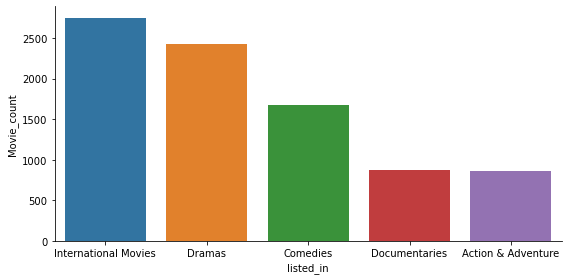

In [175]:
sns.catplot(x="listed_in", y="Movie_count",
                data=data_listmov_count.head(), kind="bar",
                height=4, aspect=2)

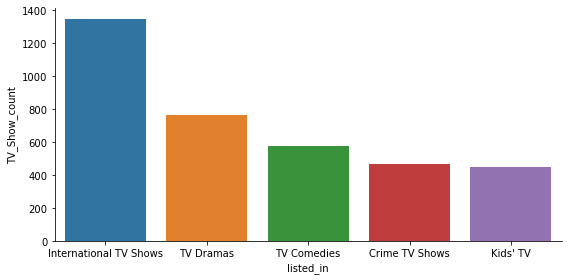

In [176]:
sns.catplot(x="listed_in", y="TV_Show_count",
                data=data_listtv_count.head(), kind="bar",
                height=4, aspect=2)

In [177]:
data_ctrymov_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 114 to 61
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  123 non-null    object
 1   title    123 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


### 4.1.3 Multivariate Analysis

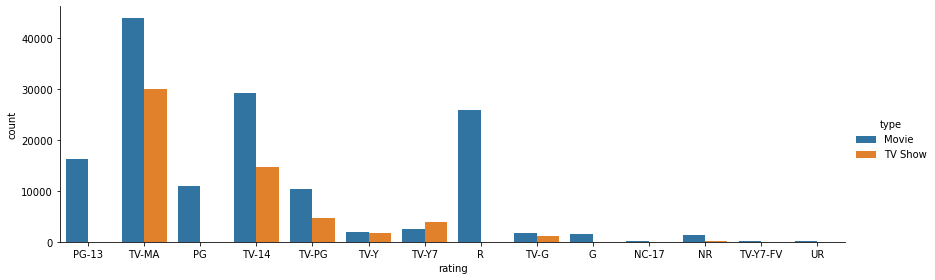

In [178]:
#sns.countplot(data=data_listed_in,x='rating',hue='type')

sns.catplot(x="rating", hue="type",
               data=data_listed_in, kind="count",
              height=4, aspect=3)

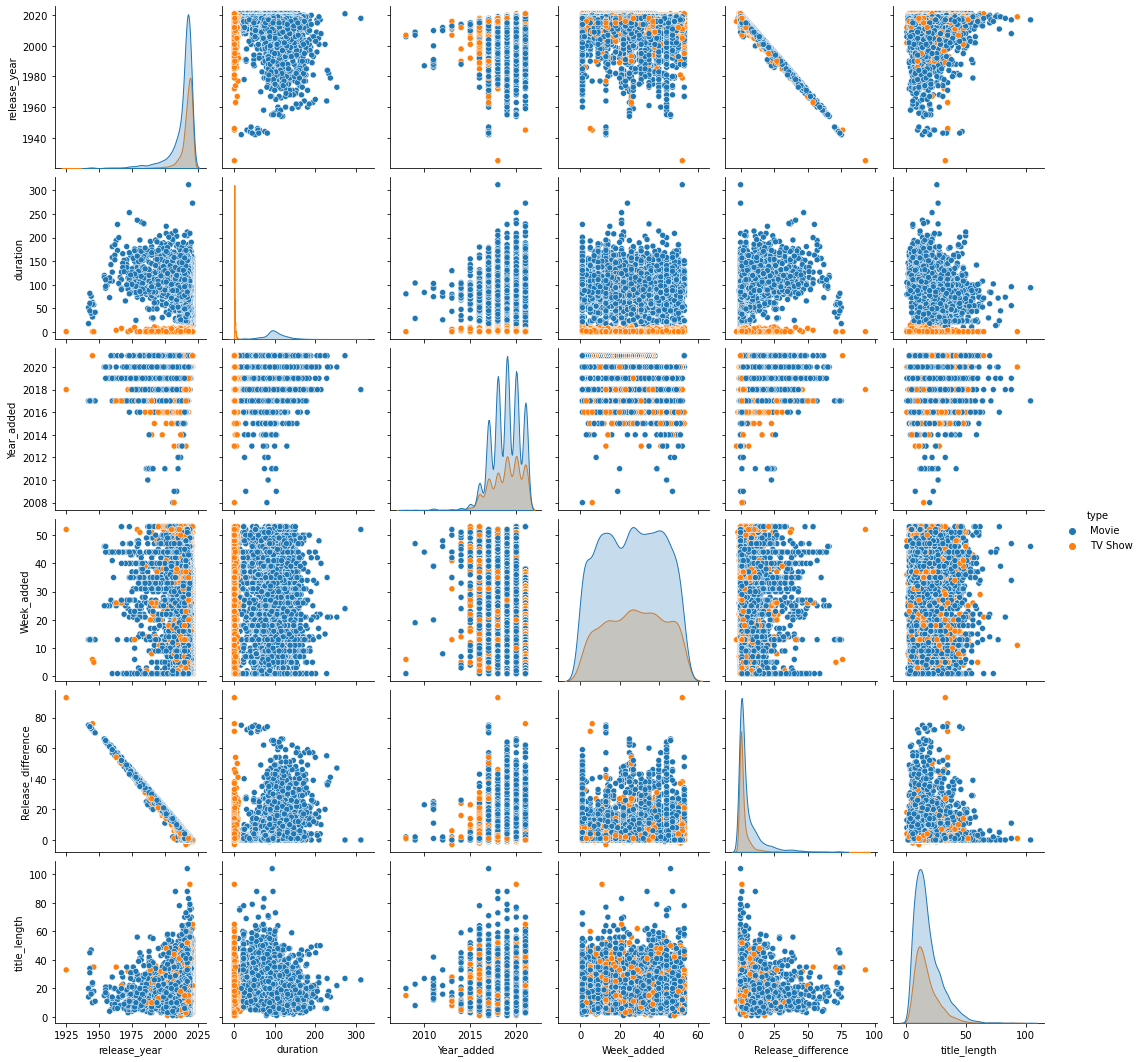

In [179]:
sns.pairplot(data=data,hue='type')